# There is a Lack of Tourists Dataset Coming to Egypt. So, we will Generate one!

In [ ]:
import pandas as pd
import random

fake = Faker()
random.seed(1)

places = pd.read_csv("Placesmerged_data.csv")
required_cols = ["place_id", "place_name", "place_type", "city", "Climate", "Operating_Hours"]
places = places[required_cols]

# the sample place data data
favorite_types = ["Monument", "Nature", "Museum", "Religious", "Beach", "Market", "Historic", "Desert"]
nationalities = ["USA", "UK", "France", "Germany", "Italy", "China", "Japan", "Spain", "Brazil", "Australia", "KSA", "Russia", "Canada"]
occupations = ["Engineer", "Doctor", "Teacher", "Nurse", "Artist", "Scientist", "Musician", "Writer", "Chef", "Pilot", "Student", "Businessman", "Lawyer", "Accountant", "Designer", "Software Developer"]

rows = []
n_users = 1000
for user_id in range(1, n_users + 1):
    age = random.randint(18, 70)
    nationality = random.choice(nationalities)
    favorite_type = random.choice(favorite_types)
    occupation = random.choice(occupations)

    # this is a Sample 10 places for each user
    visited = list(places.sample(10).itertuples(index=False, name=None))

    for place in visited:
        if place[2] == favorite_type:
             base = 4
        else:
             base = 3
        noise = random.choices([-1, 0, 1], weights=[0.075, 0.85, 0.075])[0]
        rating = max(0, min(5, base + noise + (1 if place[2] == favorite_type else 0)))

        rows.append([
            user_id, age, nationality, occupation, favorite_type, rating,
            place[0], place[1], place[2], place[3], place[4], place[5]
        ])

# Final dataframe
columns = [
    "user_id", "age", "nationality", "Occupation", "favorite_type",
    "rating", "place_id", "place_name", "place_type", "city", "Climate", "Operating_Hours"
]

df = pd.DataFrame(rows, columns=columns)
df.to_csv("AfterMerging/RecommenderData2.csv", index=False)

print(f"✅ Done! Total records: {len(df)} (Users: {n_users}, Each: 10 places)")

✅ Done! Total records: 10000 (Users: 1000, Each: 10 places)


In [839]:
import pandas as pd

# Load the original data
users_df = df[['user_id', 'age', 'nationality', 'Occupation', 'favorite_type']].drop_duplicates()
users_df.to_csv("AfterMerging/users.csv", index=False)

# --------- PLACES ---------
places_df = df[['place_id', 'place_name', 'place_type', 'city', 'Climate', 'Operating_Hours']].drop_duplicates()
places_df.to_csv("AfterMerging/places.csv", index=False)

# --------- INTERACTIONS ---------
interactions_df = df[['user_id', 'place_id', 'rating']]
interactions_df.to_csv("AfterMerging/interactions.csv", index=False)

print(f"✅ Done splitting!")
print(f"Users: {len(users_df)}")
print(f"Places: {len(places_df)}")
print(f"Interactions: {len(interactions_df)}")


✅ Done splitting!
Users: 1000
Places: 108
Interactions: 10000


In [840]:
users_df.reset_index(drop=True, inplace=True)
places_df.reset_index(drop=True, inplace=True)
interactions_df.reset_index(drop=True, inplace=True)

In [956]:
users_df.head()

,user_id,age,nationality,Occupation,favorite_type
0,1,26,Australia,Chef,Nature
1,2,62,Spain,Writer,Beach
2,3,51,Germany,Software Developer,Desert
3,4,58,Russia,Nurse,Beach
4,5,49,Brazil,Doctor,Historic


In [955]:
interactions_df.head()

,user_id,place_id,rating
0,1,15,3
1,1,25,3
2,1,16,3
3,1,1,3
4,1,88,3


In [957]:
places_df.head()

,place_id,place_name,place_type,city,Climate,Operating_Hours
0,15,Alexandria Library,Museum,Alexandria,Hot,7:00-15:00
1,25,Mary’s Tree,Archaeological Site,Cairo,Mild,10:00-20:00
2,16,Montaza Palace,Historic,Alexandria,Windy,7:00-15:00
3,1,Giza Pyramids,Monument,Giza,Mild,24 Hours
4,88,Giza Plateau,Archaeological Site,Giza,Hot,10:00-20:00


In [958]:
print(interactions_df.describe())
print('\n')
print(interactions_df.describe())

            user_id      place_id        rating
count  10000.000000  10000.000000  10000.000000
mean     500.500000     54.956000      3.153900
std      288.689425     31.301374      0.644714
min        1.000000      1.000000      2.000000
25%      250.750000     28.000000      3.000000
50%      500.500000     55.000000      3.000000
75%      750.250000     82.000000      3.000000
max     1000.000000    108.000000      5.000000


            user_id      place_id        rating
count  10000.000000  10000.000000  10000.000000
mean     500.500000     54.956000      3.153900
std      288.689425     31.301374      0.644714
min        1.000000      1.000000      2.000000
25%      250.750000     28.000000      3.000000
50%      500.500000     55.000000      3.000000
75%      750.250000     82.000000      3.000000
max     1000.000000    108.000000      5.000000


In [959]:
interactions_df

,user_id,place_id,rating
0,1,15,3
1,1,25,3
2,1,16,3
3,1,1,3
4,1,88,3
...,...,...,...
9995,1000,64,3
9996,1000,97,3
9997,1000,21,3
9998,1000,31,3


In [960]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [961]:
UsersCount = users_df['user_id'].nunique()
PlacesCount = places_df['place_id'].nunique()

In [846]:
result = users_df.groupby('age').count()

In [847]:
result.rename(columns={'user_id': 'count'}, inplace=True)
result = result.reset_index()

In [848]:
result = result[['age', 'count']]

# USER COUNT BY AGE

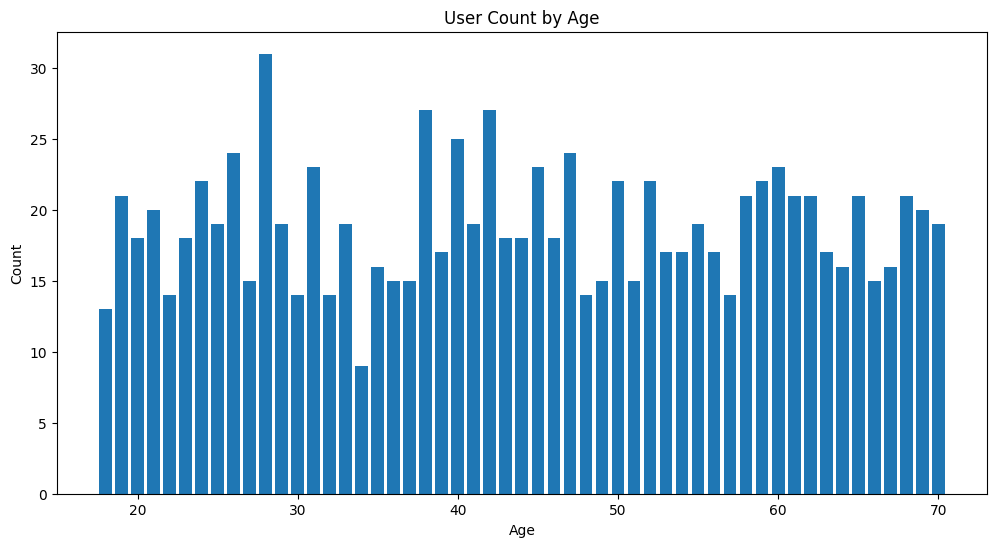

In [849]:
plt.figure(figsize=(12, 6))
plt.bar(result['age'], result['count'])
plt.title('User Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [850]:
ratingSums = interactions_df.groupby('place_id').mean()
ratingSums.reset_index(inplace=True)
ratingSums.drop(columns=['user_id'], inplace=True)
ratingSums.sort_values(by = 'rating', ascending=False, inplace=True)
ratingSums['rating'] = ratingSums['rating']

In [962]:
display(ratingSums)

,place_id,rating
60,61,3.478723
74,75,3.428571
40,41,3.425532
79,80,3.421687
28,29,3.409091
...,...,...
86,87,2.935484
41,42,2.930000
105,106,2.926316
52,53,2.924731


# Number of Users by Place ID

/var/folders/jb/g3rwd6rn2t7gf564dxhf10hr0000gn/T/ipykernel_38791/3071106830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='place_id', y='rating', data=ratingSums, palette='viridis')


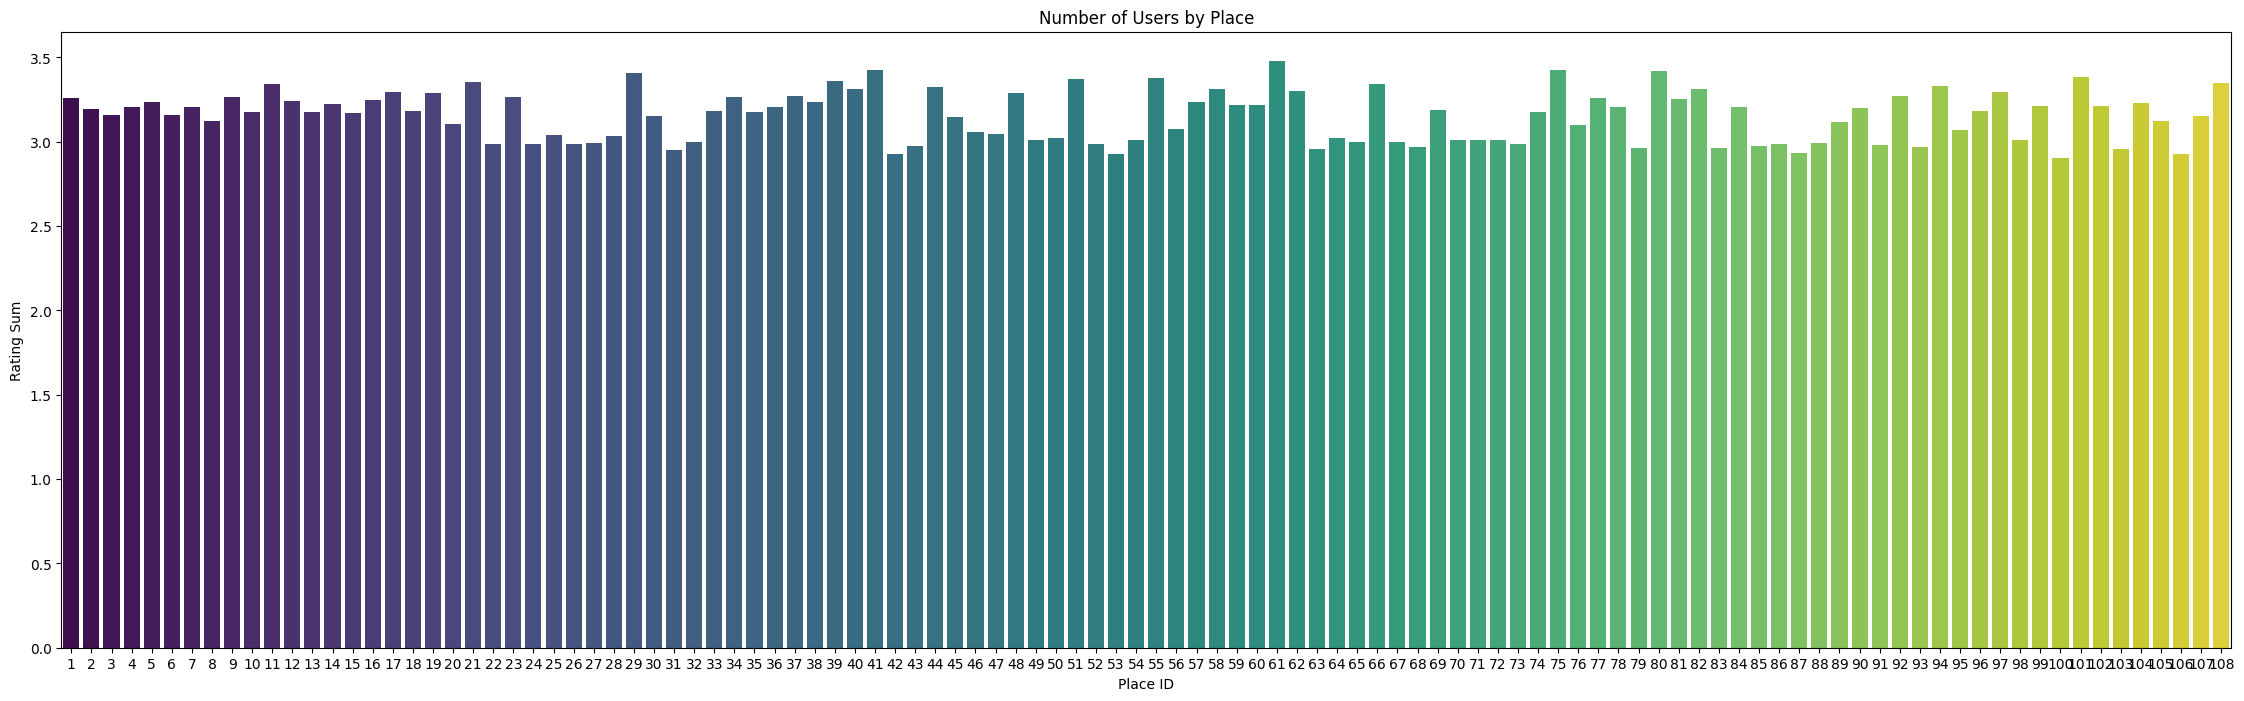

In [854]:
plt.figure(figsize=(28, 8))
sns.barplot(x='place_id', y='rating', data=ratingSums, palette='viridis')
plt.title('Number of Users by Place')
plt.xlabel('Place ID')
plt.ylabel('Rating Sum')
plt.show()

In [855]:
most_voted = (interactions_df.groupby('place_id')[['rating']]
                     .sum()
                     .sort_values('rating', ascending=False)
                     .reset_index())
most_voted = most_voted.merge(places_df, on='place_id', how='left')

In [856]:
res = most_voted[['rating','place_name']].max()
print(f"Most voted place: {res['place_name']} with a rating of {res['rating']}")

Most voted place: the National Museum of Suez with a rating of 376


/var/folders/jb/g3rwd6rn2t7gf564dxhf10hr0000gn/T/ipykernel_38791/2364085568.py:4: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(res['place_name'], res['place_name'])


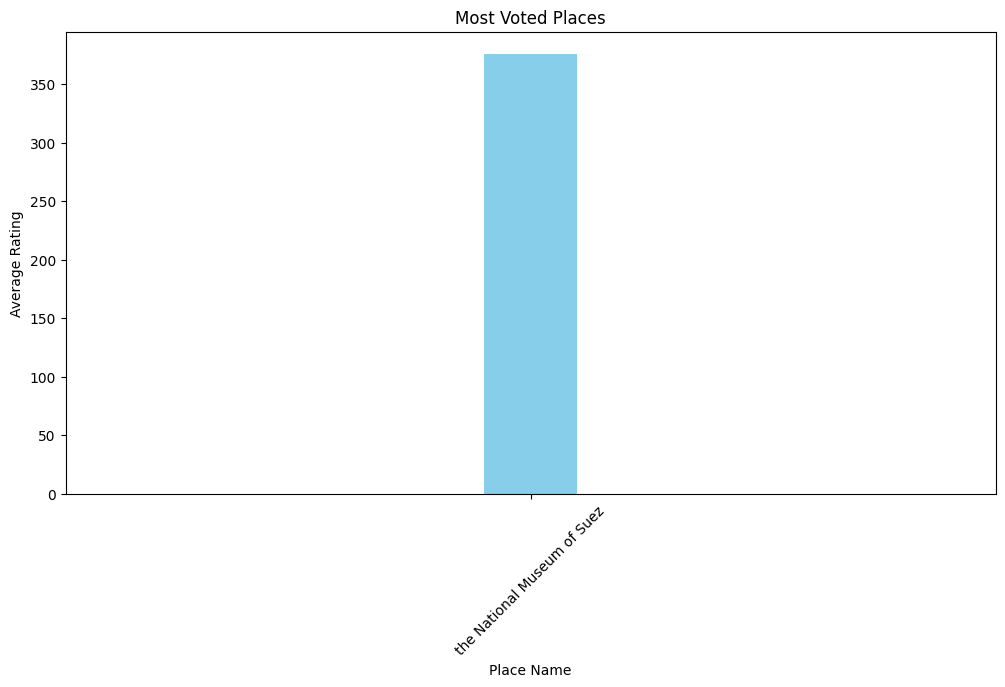

In [969]:
plt.figure(figsize=(12, 6))
plt.bar(res['place_name'], res['rating'], color='skyblue',width=0.01)
plt.title('Most Voted Places')
plt.xlim(res['place_name'], res['place_name'])
plt.xlabel('Place Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [894]:
data = interactions_df.merge(users_df, on='user_id', how='left')\
                      .merge(places_df, on='place_id', how='left')

## Fill all The N/A Cities in data

In [ ]:
data['city'] = data['city'].fillna('Egypt')  # Fill NaN values in 'city' column with 'Egypt'

# **Recommender System**

In [702]:
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader, SVD, accuracy, KNNBasic
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import pickle

# Collaborative Filtering

### Single Value Decomposition (SVD)

In [ ]:

reader = Reader(rating_scale=(0, 5))
dataset = Dataset.load_from_df(interactions_df[['user_id', 'place_id', 'rating']], reader) # load the dataset from interactions_df
trainset, testset = train_test_split(dataset, test_size=0.2)

model = SVD() # train the Singular Value Decomposition model
model.fit(trainset)

In [877]:
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.6148
RMSE: 0.6148184414068489


In [878]:
PlacesToVisit = []
def recommend_for_user(model, interactions_df, user_id, top_n=5):
    all_place_ids = set(interactions_df['place_id'].unique())
    visited = set(interactions_df[interactions_df['user_id'] == user_id]['place_id'])
    unvisited = all_place_ids - visited

    predictions = []
    for place_id in unvisited:
        pred = model.predict(uid=user_id, iid=place_id)
        predictions.append((place_id, pred.est))
        
    # Sort
    top_recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n]
    
    # Show names
    results = []
    for place_id, score in top_recommendations:
        place_name = places_df[places_df['place_id']==place_id]['place_name'].iloc[0]
        results.append({'place_id': place_id, 'place_name': place_name, 'predicted_rating': score})
    return results

# Example usage
user_id = 43
recommendations = recommend_for_user(model, interactions_df, user_id, top_n=2)
for i in recommendations:
    PlacesToVisit.append(i['place_name'])

In [879]:
for place in PlacesToVisit:
    print(f"Recommended place for user {user_id}: {place}")

Recommended place for user 43: Helwan Corner Museum
Recommended place for user 43: Cairo International Airport Museum - Terminal 2


In [ ]:
with open('Recommender_SVD.pkl', 'wb') as f: # save the model to a pkl file
    pickle.dump(model, f)

## Testing the SVD

In [971]:
with open('Recommender_SVD.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
predictions = loaded_model.test(testset)
print("RMSE:", round(accuracy.rmse(predictions), 2))
print("MAE:", round(accuracy.mae(predictions), 2))

RMSE: 0.6148
RMSE: 0.61
MAE:  0.4077
MAE: 0.41


## K-Nearest-Neighbours Approach

In [ ]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(interactions_df, reader)
trainset = data.build_full_trainset()

model2 = KNNBasic(sim_options={"user_based": False}) # train the KNN model
model2.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [886]:
preds2 = model2.test(testset)

In [972]:
print("RMSE:", round(accuracy.rmse(preds2), 3))
print("MAE:", round(accuracy.mae(preds2), 3))


RMSE: 0.4711
RMSE: 0.471
MAE:  0.2957
MAE: 0.296


In [ ]:
with open('Recommender_KNN.pkl', 'wb') as f: # save the KNN model to a pkl file
    pickle.dump(model2, f)

In [973]:
with open('Recommender_KNN.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

predictions = loaded_model.test(testset)
print("RMSE:", round(accuracy.rmse(predictions), 2))
print("MAE:", round(accuracy.mae(predictions), 2))


RMSE: 0.4711
RMSE: 0.47
MAE:  0.2957
MAE: 0.3


In [891]:
recommendations = recommend_for_user(model2, interactions_df, user_id, top_n=2)
for i in recommendations:
    PlacesToVisit.append(i['place_name'])
for place in PlacesToVisit:
    print(f"Recommended place for user {user_id}: {place}")

Recommended place for user 43: Helwan Corner Museum
Recommended place for user 43: Cairo International Airport Museum - Terminal 2
Recommended place for user 43: Sabil of al-Amir Shaykhu
Recommended place for user 43: Nile Stelae


In [896]:
data.to_csv('AfterMerging/FullData.csv', index=False)

In [ ]:
data = pd.read_csv('combined_egypt_data.csv')
data.columns

In [ ]:
data.drop(columns=['URL' , 'Insider Tips', 'Highlights'], inplace=True)
nan_sunday_mask = data['Sunday'].isna()
data.loc[nan_sunday_mask, 'Sunday'] = data.loc[nan_sunday_mask, 'Sunday'].apply(lambda x: random.choice(hours))
data.rename(columns={'Sunday': 'Operating_Hours'}, inplace=True)

In [758]:
def generate_ticket_prices():
    foreign_adult = random.randint(100, 400)
    foreign_student = foreign_adult // 2
    egyptian_adult = random.randint(10, 50)
    egyptian_student = egyptian_adult // 2
    return f"FOREIGNER:\nAdult: EGP {foreign_adult}\nStudent: EGP {foreign_student}\n\nEGYPTIAN \\ ARABS:\nAdult: EGP {egyptian_adult}\nStudent: EGP {egyptian_student}"


In [759]:
data['Tickets'] = data['Tickets'].where(data['Tickets'].notna(), [generate_ticket_prices() for _ in range(len(data))])


In [778]:
for i in places:
    if i[1] not in data['Name'].values:
        print(i)

(1, 'Giza Pyramids', 'Monument', 'Giza', 'Mild', '24 Hours')
(2, 'Egyptian Museum', 'Museum', 'Cairo', 'Sunny', '10:00-20:00')
(3, 'Ras Mohamed National Park', 'Nature', 'Sharm El Sheikh', 'Sunny', '7:00-15:00')
(4, "Saint Catherine's Monastery", 'Religious', 'South Sinai', 'Rainy', '7:00-15:00')
(5, 'Dahab', 'Beach', 'South Sinai', 'Cool', '9:00-18:00')
(6, 'Karnak Temple', 'Monument', 'Luxor', 'Sunny', '7:00-15:00')
(7, 'Siwa Oasis', 'Desert', 'Siwa', 'Hot', '7:00-15:00')
(8, 'Aswan Philae Temple', 'Historic', 'Aswan', 'Cool', '24 Hours')
(9, 'El Alamein Military Museum', 'Museum', 'El Alamein', 'Hot', '6:00-22:00')
(11, 'Coptic Cairo', 'Religious', 'Cairo', 'Windy', '24 Hours')
(12, 'Al-Azhar Park', 'Nature', 'Cairo', 'Sunny', '10:00-20:00')
(13, 'Khan El Khalili', 'Market', 'Cairo', 'Hot', '8:00-17:00')
(14, 'Abu Simbel Temples', 'Monument', 'Aswan', 'Hot', '6:00-22:00')
(15, 'Alexandria Library', 'Museum', 'Alexandria', 'Hot', '7:00-15:00')
(16, 'Montaza Palace', 'Historic', 'Alex

In [ ]:
data['place_id'] = None
Ids21_to108Randomized = random.sample(range(21, 109), len(data))
data.loc[:len(Ids21_to108Randomized)-1, 'place_id'] = Ids21_to108Randomized

In [ ]:
data.rename(columns = {'Type': 'place_type', 'Name': 'place_name', 'Location': 'city'}, inplace=True)
climate_random = random.choices(climates, k=len(data))
data['Climate'] = climate_random
data.drop(columns=['Tickets'], inplace=True)
data.to_csv("combined_egypt_data.csv", index=False)

# All Places after mergings

In [ ]:
appended_df = pd.read_csv("Placesmerged_data.csv")
display(appended_df[appended_df['city'].isna()])

,Climate,Operating_Hours,city,place_id,place_name,place_type


In [976]:
count = appended_df[appended_df['city'].isna()].count()
count

Climate            0
Operating_Hours    0
city               0
place_id           0
place_name         0
place_type         0
dtype: int64

# Content-Filtering Using Cosine Simlarity on Places Features

In [897]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [911]:
content = places_df.columns[2:5]
featuresSelected = places_df[content]

In [ ]:
# One-hot encode
encoder = OneHotEncoder()
encoded_feats = encoder.fit_transform(featuresSelected).toarray()

# Store mapping for later use
feature_names = encoder.get_feature_names_out(content)

features_df = pd.DataFrame(encoded_feats, columns=feature_names)
features_df['place_id'] = places_df['place_id'].values

# Merge for easy lookup by place_id
features = place_features_df.set_index('place_id')

In [914]:
print(feature_names)
print(final_place_features.head())

['place_type_Archaeological Site' 'place_type_Beach' 'place_type_Desert'
 'place_type_Historic' 'place_type_Market' 'place_type_Monument'
 'place_type_Museum' 'place_type_Nature' 'place_type_Religious'
 'place_type_Sunken Monuments' 'city_Al-Minya' 'city_Al-Sharkia'
 'city_Alexandria' 'city_Aswan' 'city_Beni Suef' 'city_Cairo'
 'city_El Alamein' 'city_Fayoum' 'city_Giza' 'city_Hurghada'
 'city_Kafr El-Sheikh' 'city_Luxor' 'city_Matrouh' 'city_Qena'
 'city_Red Sea' 'city_Sharm El Sheikh' 'city_Siwa' 'city_Sohag'
 'city_South Sinai' 'city_nan' 'Climate_Cool' 'Climate_Dry' 'Climate_Hot'
 'Climate_Humid' 'Climate_Mild' 'Climate_Rainy' 'Climate_Sunny'
 'Climate_Windy']
          place_type_Archaeological Site  place_type_Beach  place_type_Desert  \
place_id                                                                        
15                                   0.0               0.0                0.0   
25                                   1.0               0.0                0.0   
16 

In [927]:
user_profiles = dict()
top_rating = 4 # You can adjust

for user_id in users_df['user_id']:
    liked_places = interactions_df[(interactions_df['user_id'] == user_id) & (interactions_df['rating'] >= top_rating)]['place_id'].values
    if len(liked_places) == 0:
        continue  # Skip if user has no high ratings
    print(f"User {user_id} has {len(liked_places)} liked places.")
    liked_features = final_place_features.loc[liked_places].values
    user_profiles[user_id] = liked_features.mean(axis=0)

User 2 has 2 liked places.
User 3 has 2 liked places.
User 4 has 3 liked places.
User 6 has 4 liked places.
User 7 has 1 liked places.
User 8 has 4 liked places.
User 9 has 1 liked places.
User 10 has 2 liked places.
User 11 has 1 liked places.
User 12 has 3 liked places.
User 13 has 1 liked places.
User 14 has 2 liked places.
User 15 has 3 liked places.
User 19 has 1 liked places.
User 20 has 4 liked places.
User 21 has 1 liked places.
User 23 has 3 liked places.
User 27 has 4 liked places.
User 28 has 1 liked places.
User 30 has 2 liked places.
User 32 has 1 liked places.
User 33 has 2 liked places.
User 34 has 2 liked places.
User 35 has 3 liked places.
User 36 has 2 liked places.
User 37 has 1 liked places.
User 39 has 1 liked places.
User 40 has 1 liked places.
User 41 has 2 liked places.
User 43 has 1 liked places.
User 44 has 1 liked places.
User 45 has 1 liked places.
User 46 has 2 liked places.
User 47 has 4 liked places.
User 50 has 1 liked places.
User 51 has 2 liked places.

### Cosine Similarity

In [940]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def content_based_recommend(user_id, top_n=5):
    # Skip if profile not built (no high ratings)
    if user_id not in user_profiles:
        print("No profile for user", user_id)
        return []

    # Places user has visited
    visited = set(interactions_df[interactions_df['user_id']==user_id]['place_id'])
    candidates = set(places_df['place_id']) - visited

    user_vec = user_profiles[user_id].reshape(1, -1)
    place_matrix = final_place_features.loc[list(candidates)].values

    # Compute similarity (higher is more similar)
    sims = cosine_similarity(user_vec, place_matrix)[0]
    scored = list(zip(list(candidates), sims))
    scored.sort(key=lambda x: x[1], reverse=True)
    
    results = []
    for pid, sim in scored[:top_n]:
        predRating  = sim * top_rating + 1
        info = places_df[places_df['place_id']==pid].iloc[0]
        results.append({ # populate the results
            'place_name': info['place_name'],
            'similarity': sim,
            'predicted_rating': round(predRating,1)
        })
    return results

# Example usage:
user_id = 41
cbf_recommendations = content_based_recommend(user_id, top_n=1)
print("CBF Recommendations for user", user_id)
for r in cbf_recommendations:
    print(f" {r['place_name']}: (similarity=>{r['similarity']:.2f} with a rating of {r['predicted_rating']})")

CBF Recommendations for user 41
 The Walls of Cairo: (similarity=>0.91 with a rating of 4.7)


# Now For the LLM Integration!

In [1002]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
from dotenv import load_dotenv
import pandas as pd
import pprint
import os

## Initialize all needed Variables such as Client, Apis and Embbedding Model used for RAG System

In [979]:
load_dotenv()
apikey = os.getenv("OPENAI_API_KEY") # load the OpenAI API key from the .env file

embeddingModel = OpenAIEmbeddings(api_key=apikey, model="text-embedding-3-small") # the emdding model using OpenAI's API
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) # the text splitter to split documents into smaller chunks

In [981]:
# the system prompt
systemPrompt = """
You are a helpful assistant. Provide recommendations for the user based on their preferences.
User ID: {user_id}
Below is a list of recommended places based on the user's past interactions:

{recommendations}

For each place, give a brief description and list them one by one, clearly and concisely.

You have access to more detailed information, such as climate, city locations, and operating hours, for each place:
{Rec}
**Only** provide this extra information when the user explicitly asks for details about locations, features, climate, or operating hours. If not asked, do not mention or reveal this information.
"""

In [982]:
client = ChatOpenAI(model="gpt-4o", api_key=apikey, temperature=0.7, max_tokens=450) # the chat client using OpenAI's GPT-4o model

### RAG VectorStore Pipeline

In [ ]:
def RaggedVectorStore():
    columns_to_join = ['place_name', 'place_type', 'city', 'Operating_Hours']  # change these to your columns

    df = pd.read_csv("Dell/Implementation/AfterMerging/Ragged.csv")

    # Create documents by concatenating selected columns
    documents = [ # Create a list of Document objects
        Document(
            page_content=' '.join([str(row[col]) for col in columns_to_join]),
            metadata=row.to_dict()
        )
        for _, row in df.iterrows()
    ]

    # Create and save the FAISS vectorstore
    VectorStore = FAISS.from_documents(documents, embeddingModel)
    VectorStore.save_local("Dell/Implementation/PlacesVectorStore")
    return VectorStore

In [987]:
PlacesToVisit = [] # List to store recommended places for the user
if not os.path.exists("PlacesVectorStore"):
    print("VectorStore not found, creating a new one...")
    vectorStore = RaggedVectorStore()
else:
    vectorStore = FAISS.load_local("PlacesVectorStore", embeddingModel, allow_dangerous_deserialization = True) # Load the existing vectorstore

In [992]:
def RecommenderModel(): # Load the KNN model for recommendations
    with open('Recommender_KNN.pkl', 'rb') as file: # replace it with pkl file path if needed (KNN) is more efficient for this task
        model = pickle.load(file)
    return model

### Retrieving the Recommended Data Info

In [999]:

def retrieve_places(query, vectorstore):    
    # Retrieve relevant documents from the vectorstore
    retrieved_docs = vectorstore.similarity_search(query, k=2)
    
    # Extract place names and descriptions from the retrieved documents
    results = []
    for doc in retrieved_docs:
        place_name = doc.metadata.get('place_name', 'Unknown Place')
        climate = doc.metadata.get('Climate', 'Unknown Climate')
        operating_hours = doc.metadata.get('Operating_Hours', 'Unknown Hours')
        city = doc.metadata.get('city', 'Unknown City')
        results.append(
            f"place_name: {place_name}, climate: {climate}, operating_hours: {operating_hours}, city: {city}"
        )
    
    return results

In [1005]:
user_id = 154 # just an example user_id, you can change it to any valid user_id from your dataset
# Example usage
recommendations = recommend_for_user(RecommenderModel(), interactions_df, user_id, top_n=1, places_df=places_df)
for i in recommendations:
    PlacesToVisit.append(i['place_name'])

input = "Give me a place to visit in Egypt"

# Example usage of the recommender system with RAG pipeline
retrievedInfo =  retrieve_places(input, vectorStore)
prompt = ChatPromptTemplate.from_messages([
        ("system", systemPrompt.format(user_id=user_id, recommendations=PlacesToVisit, Rec = str(retrievedInfo))),
        ("human", "{input}"),
    ])

chain = prompt | client

response = chain.invoke({"input": input})

print(f"The Final Response: {response.content}")

The Final Response: I recommend visiting Ras Mohamed National Park. It is a stunning national park located at the southern tip of the Sinai Peninsula in Egypt, renowned for its breathtaking coral reefs, diverse marine life, and beautiful beaches. It's a perfect destination for snorkeling, diving, and enjoying the natural beauty of the Red Sea.


# Thank You :) !